In [45]:
import pandas as pd
import matplotlib.pyplot as plt 
import math
from collections import Counter
import random
path = "./Datasets/Saber_reducido.csv"

In [17]:
Keys = ["ESTU_GENERO","ESTU_FECHANACIMIENTO","PERIODO","ESTU_DEPTO_RESIDE","FAMI_ESTRATOVIVIENDA","FAMI_PERSONASHOGAR","FAMI_CUARTOSHOGAR","FAMI_EDUCACIONPADRE","FAMI_EDUCACIONMADRE","FAMI_TRABAJOLABORPADRE","FAMI_TRABAJOLABORMADRE","FAMI_TIENESERVICIOTV","FAMI_TIENECOMPUTADOR","FAMI_TIENEAUTOMOVIL","FAMI_TIENEMOTOCICLETA","FAMI_TIENECONSOLAVIDEOJUEGOS","FAMI_NUMLIBROS","FAMI_COMELECHEDERIVADOS","FAMI_COMECARNEPESCADOHUEVO","FAMI_COMECEREALFRUTOSLEGUMBRE","FAMI_SITUACIONECONOMICA","ESTU_DEDICACIONLECTURADIARIA","ESTU_DEDICACIONINTERNET","COLE_NOMBRE_ESTABLECIMIENTO","COLE_NATURALEZA","COLE_CARACTER","COLE_AREA_UBICACION","COLE_JORNADA","PUNT_LECTURA_CRITICA","PERCENTIL_LECTURA_CRITICA","PUNT_MATEMATICAS","PERCENTIL_MATEMATICAS","PUNT_C_NATURALES","PERCENTIL_C_NATURALES","PUNT_SOCIALES_CIUDADANAS","PERCENTIL_SOCIALES_CIUDADANAS","PUNT_INGLES","PERCENTIL_INGLES","PUNT_GLOBAL","PERCENTIL_GLOBAL","ESTU_NSE_ESTABLECIMIENTO","ESTU_INSE_INDIVIDUAL","ESTU_NSE_INDIVIDUAL"]

In [18]:
tmp = ["ESTU_GENERO","ESTU_FECHANACIMIENTO","PERIODO","ESTU_DEPTO_RESIDE","FAMI_ESTRATOVIVIENDA","FAMI_PERSONASHOGAR","FAMI_CUARTOSHOGAR","FAMI_EDUCACIONPADRE","FAMI_EDUCACIONMADRE","FAMI_TRABAJOLABORPADRE","FAMI_TRABAJOLABORMADRE","FAMI_TIENESERVICIOTV","FAMI_TIENECOMPUTADOR","FAMI_TIENEAUTOMOVIL","FAMI_TIENEMOTOCICLETA","FAMI_TIENECONSOLAVIDEOJUEGOS","FAMI_NUMLIBROS","FAMI_COMELECHEDERIVADOS","FAMI_COMECARNEPESCADOHUEVO","FAMI_COMECEREALFRUTOSLEGUMBRE","FAMI_SITUACIONECONOMICA","ESTU_DEDICACIONLECTURADIARIA ","ESTU_DEDICACIONINTERNET","COLE_NOMBRE_ESTABLECIMIENTO","COLE_NATURALEZA COLE_BILINGUE","COLE_CARACTER","COLE_AREA_UBICACION","COLE_JORNADA","PUNT_LECTURA_CRITICA","PERCENTIL_LECTURA_CRITICA","PUNT_MATEMATICAS","PERCENTIL_MATEMATICAS","PUNT_C_NATURALES","PERCENTIL_C_NATURALES","PUNT_SOCIALES_CIUDADANAS","PERCENTIL_SOCIALES_CIUDADANAS","PUNT_INGLES","PERCENTIL_INGLES","PUNT_GLOBAL","PERCENTIL_GLOBAL","ESTU_NSE_ESTABLECIMIENTO","ESTU_INSE_INDIVIDUAL","ESTU_NSE_INDIVIDUAL",
]

for element in Keys:
    if element not in tmp:
        print(element)


ESTU_DEDICACIONLECTURADIARIA
COLE_NATURALEZA


In [52]:
data = pd.read_csv(path, low_memory=False)

In [53]:
data.head()

,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_DEPTO_RESIDE,FAMI_ESTRATOVIVIENDA,FAMI_PERSONASHOGAR,FAMI_CUARTOSHOGAR,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TRABAJOLABORPADRE,...,PERCENTIL_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PERCENTIL_SOCIALES_CIUDADANAS,PUNT_INGLES,PERCENTIL_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_NSE_ESTABLECIMIENTO,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL
0,M,16,20182,ATLANTICO,Estrato 2,7 a 8,Cuatro,No sabe,No sabe,Es vendedor o trabaja en atención al público,...,67,57,76,65.0,90,305,85,2.0,53.169929,NSE3
1,M,17,20182,CORDOBA,Estrato 1,5 a 6,Dos,Secundaria (Bachillerato) completa,Primaria completa,Trabaja por cuenta propia (por ejemplo plomero...,...,53,40,28,48.0,46,242,46,2.0,45.062853,NSE2
2,M,16,20182,VALLE,Estrato 2,1 a 2,Dos,No sabe,Técnica o tecnológica incompleta,No sabe,...,40,45,43,47.0,42,241,45,2.0,44.806936,NSE2
3,M,17,20182,BOYACA,Estrato 3,3 a 4,Tres,No sabe,Educación profesional completa,No sabe,...,84,67,94,63.0,86,310,87,3.0,73.630225,NSE4
4,M,19,20182,BOGOTA,Estrato 2,7 a 8,Tres,No sabe,No sabe,No aplica,...,45,49,55,56.0,71,257,57,3.0,49.391007,NSE2


In [60]:
data.iloc[0]

ESTU_GENERO                                                                      M
ESTU_FECHANACIMIENTO                                                            16
PERIODO                                                                      20182
ESTU_DEPTO_RESIDE                                                        ATLANTICO
FAMI_ESTRATOVIVIENDA                                                     Estrato 2
FAMI_PERSONASHOGAR                                                           7 a 8
FAMI_CUARTOSHOGAR                                                           Cuatro
FAMI_EDUCACIONPADRE                                                        No sabe
FAMI_EDUCACIONMADRE                                                        No sabe
FAMI_TRABAJOLABORPADRE                Es vendedor o trabaja en atención al público
FAMI_TRABAJOLABORMADRE                Es vendedor o trabaja en atención al público
FAMI_TIENESERVICIOTV                                                            Si
FAMI

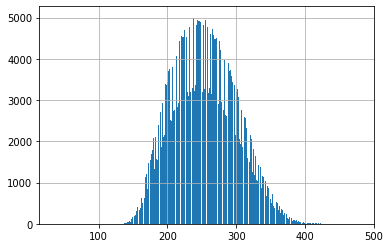

In [65]:
tmp = data[data["COLE_JORNADA"] == "MAÑANA"]
tmp["PUNT_GLOBAL"].hist(bins = 500)

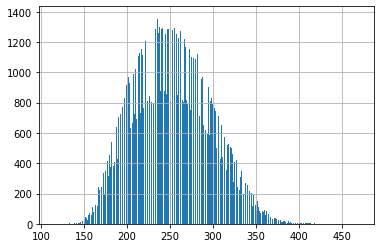

In [66]:
tmp = data[data["COLE_JORNADA"] == "TARDE"]
tmp["PUNT_GLOBAL"].hist(bins = 500)

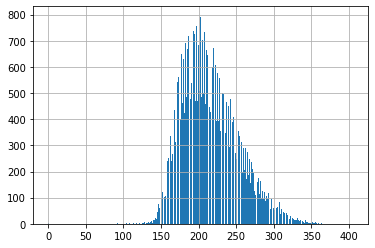

In [67]:
tmp = data[data["COLE_JORNADA"] == "NOCHE"]
tmp["PUNT_GLOBAL"].hist(bins = 500)

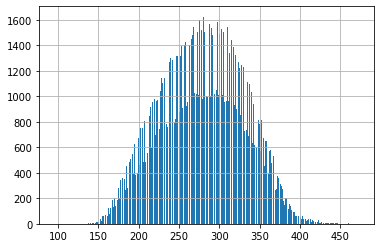

In [68]:
tmp = data[data["COLE_JORNADA"] == "COMPLETA"]
tmp["PUNT_GLOBAL"].hist(bins = 500)

## tabla de contingencia

In [70]:
pd.crosstab(data['FAMI_TIENESERVICIOTV'], [data['FAMI_TIENECOMPUTADOR']])

FAMI_TIENECOMPUTADOR,-,No,Si
FAMI_TIENESERVICIOTV,,,
-,14817,22715,21784
No,3099,159076,83929
Si,8278,253511,509344


In [61]:
data.groupby("COLE_JORNADA").size()

COLE_JORNADA
COMPLETA    192130
MAÑANA      546387
NOCHE        58073
SABATINA     66346
TARDE       137728
UNICA        75889
dtype: int64

In [54]:
data.groupby("FAMI_ESTRATOVIVIENDA").size()/data.shape[0] * 100

FAMI_ESTRATOVIVIENDA
Estrato 1      33.376062
Estrato 2      36.522958
Estrato 3      20.296260
Estrato 4       4.685510
Estrato 5       1.574655
Estrato 6       0.785934
Sin Estrato     2.758619
dtype: float64

In [55]:
data.groupby("ESTU_FECHANACIMIENTO").size()/data.shape[0] * 100

ESTU_FECHANACIMIENTO
14     0.132553
15     3.585889
16    35.857872
17    32.480983
18    16.293578
19     6.157895
20     2.091026
21     0.947747
22     0.571175
23     0.398030
24     0.312850
25     0.255073
26     0.214574
27     0.204077
28     0.190330
29     0.165343
30     0.141006
dtype: float64

In [56]:
data.shape

(1076553, 43)

# Entropia

In [57]:
columnEval = ["FAMI_TIENESERVICIOTV","FAMI_TIENECOMPUTADOR","FAMI_TIENEAUTOMOVIL","FAMI_TIENEMOTOCICLETA","FAMI_TIENECONSOLAVIDEOJUEGOS"]

In [58]:
def EntropySum(n):
    if n == 0:
        return 0
    if n == 1:
        return 0
    else:
        return n*math.log(n,2)+(1-n)*math.log(1-n,2)

def compare(i,j,colPass):
    count = 0
    for col in columnEval:
        if data.iloc[i][col] == data.iloc[j][col]:
            if col != colPass:
                count+=1
    return count

In [59]:
entropy = 0
dataSize = 1000 #data.shape[0]
for i in range(dataSize):
    for j in range(i+1,dataSize):
        result = compare(i, j, "")
        entropy += EntropySum(result/data.shape[1])
        #if j%100 == 0:
        #    print("R",i,j,"=",result)
    print("R",i,j,"=",entropy)
print("EntropyTotal",entropy*-1)

R 0 999 = -358.5463512958228
R 1 999 = -716.5741328598598
R 2 999 = -1046.7080247594854
R 3 999 = -1299.5513813542598
R 4 999 = -1666.3467467907333
R 5 999 = -1986.6040180438963
R 6 999 = -2304.4550961115096
R 7 999 = -2556.349143324247
R 8 999 = -2911.916581958015
R 9 999 = -3228.8026089469367
R 10 999 = -3583.4049965020195
R 11 999 = -3947.340848199213
R 12 999 = -4265.013497552406
R 13 999 = -4618.285778839127
R 14 999 = -4930.1745818340905
R 15 999 = -5283.570625021381
R 16 999 = -5646.227787860593
R 17 999 = -5956.786484587232
R 18 999 = -6308.852421506197
R 19 999 = -6504.788848259677
R 20 999 = -6818.213032351571
R 21 999 = -7131.118646711677
R 22 999 = -7481.776553456888
R 23 999 = -7784.396545945944
R 24 999 = -8111.906888290234
R 25 999 = -8433.925030419494
R 26 999 = -8783.062867466297
R 27 999 = -8819.686613545917
R 28 999 = -9135.19338641528
R 29 999 = -9408.344660283145
R 30 999 = -9765.541909569703
R 31 999 = -10122.220589124474
R 32 999 = -10421.906646220803
R 33 999 = 

R 265 999 = -70497.12094660226
R 266 999 = -70694.28670768606
R 267 999 = -70970.85940300027
R 268 999 = -71243.81535296635
R 269 999 = -71475.72843117914
R 270 999 = -71741.94390811451
R 271 999 = -72013.56975181226
R 272 999 = -72234.5336384009
R 273 999 = -72470.87491636454
R 274 999 = -72670.24703387618
R 275 999 = -72898.69261539991
R 276 999 = -73137.97629633723
R 277 999 = -73410.52512563088
R 278 999 = -73656.42408366528
R 279 999 = -73884.86918450323
R 280 999 = -74129.97818321832
R 281 999 = -74310.4895355886
R 282 999 = -74528.64376575404
R 283 999 = -74755.4059445789
R 284 999 = -75025.27035189267
R 285 999 = -75294.61618947465
R 286 999 = -75552.30507882171
R 287 999 = -75809.47539843697
R 288 999 = -75987.5710861889
R 289 999 = -76154.33765559878
R 290 999 = -76396.7429029377
R 291 999 = -76620.44336514815
R 292 999 = -76644.40969128195
R 293 999 = -76907.75178340131
R 294 999 = -77165.89008391107
R 295 999 = -77389.472970026
R 296 999 = -77646.64621945708
R 297 999 = -77

KeyboardInterrupt: 